In [1]:
import pandas as pd
import numpy as np
import pywt
from matplotlib import pyplot as plt

In [2]:
# # Import data with pandas and select columns

# replace path with your data's absolute path? not sure
path = r"C:\Users\Otto\Documents\FLUXNET-CH4\data\FLX_JP-SwL_FLUXNET-CH4_2016-2016_1-1\FLX_JP-SwL_FLUXNET-CH4_2016-2016_1-1\FLX_JP-SwL_FLUXNET-CH4_HH_2016-2016_1-1.csv"

df_full = pd.read_csv(path)
df = df_full.loc[:, ["TIMESTAMP_START", "FCH4", "FCH4_F", "TA", "TA_F", "LE", "LE_F"]]

In [3]:
df.replace(-9999, np.nan, inplace=True) # replace missing with nan
# df = df.fillna(method="pad", limit=3) # fill nan, would rather not if using gap-filled _F data
# df = df.dropna() # drop nan, not if _F

In [4]:
# # Parse timestamp
df['date'] = pd.to_datetime(df['TIMESTAMP_START'], format='%Y%m%d%H%M')

# # misguided? defunct? find continuous measurements by timestamp
# df['group_no'] = df['FCH4'].isna().cumsum() 
# dfg = df.groupby('group_no').filter(lambda x: len(x) == 1)
# d = {i: df.loc[df.group_no == i, ['date', 'FCH4']] 
#      for i in range(1, df.group_no.iat[-1])}
# # ds = pd.DataFrame(d)

In [31]:
# # Compute wavelet transform on gap-filled data
cM = pd.DataFrame(pywt.wavedec(df['FCH4_F'], 'haar')).transpose()
cT = pd.DataFrame(pywt.wavedec(df['TA_F'], 'haar')).transpose()

Text(0.5, 0, 'date')

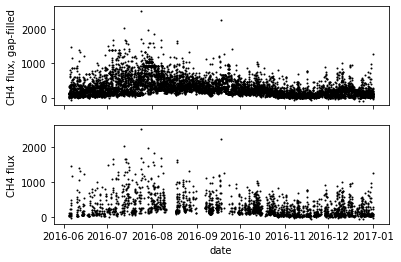

In [44]:
# scatter FCH4_F and FCH4 vs time
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)
ax[0].scatter(df['date'], df['FCH4_F'], c='k', s=1)
ax[0].set_ylabel("CH4 flux, gap-filled")

ax[1].scatter(df['date'], df['FCH4'], c='k', s=1)
ax[1].set_ylabel("CH4 flux")
ax[1].set_xlabel("date") # why printing "Text(0.5, 0, 'date')"?

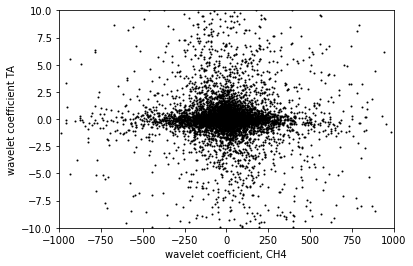

In [36]:
# Scatter of wavelet coefficients
fig, ax = plt.subplots()

for i in range(cM.shape[1]):
    ax.scatter(cM[i], cT[i], c='k', s=1)
plt.xlabel("wavelet coefficient, CH4")
plt.ylabel("wavelet coefficient, TA")
plt.xlim(-1000, 1000)
plt.ylim(-10, 10)
plt.show()

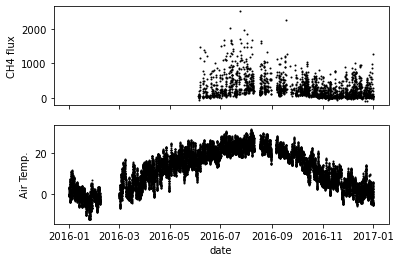

In [42]:
# Scatter of FCH4 and TA vs time
fig, axs = plt.subplots(2, 1, sharex=True, sharey=False)

axs[0].scatter(df['date'], df['FCH4'], c='k', s=1)
axs[0].set_ylabel('CH4 flux')

axs[1].scatter(df['date'], df['TA'], c='k', s=1)
axs[1].set_ylabel('Air Temp.')
axs[1].set_xlabel('date')
plt.show()